In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

N = 1000000

In [24]:
Xsphere_A = []
Ysphere_A = []
for i in np.arange(1,N+1):
    U1 = np.random.uniform(0,1)
    U2 = np.random.uniform(0,1)
    X = np.sqrt(-2*np.log(1-U1))*np.cos(2*np.pi*U2)
    Y = np.sqrt(-2*np.log(1-U1))*np.sin(2*np.pi*U2)
    Xsphere_A.append(Y)
    Ysphere_A.append(X)
    
X_A = np.array(Xsphere_A)
Y_A = np.array(Ysphere_A)

In [25]:
Xprim_A = X_A/np.sqrt(X_A*X_A+Y_A*Y_A)
Yprim_A = Y_A/np.sqrt(X_A*X_A+Y_A*Y_A)
k = 2
Xbis_A = []
Ybis_A = []

for j in np.arange(0,N):
    U = np.random.uniform(0,1)
    R = np.sqrt(U)
    Xbis_A.append(R*Xprim_A[j])    
    Ybis_A.append(R*Yprim_A[j])

In [26]:
Xsphere_B = []
Ysphere_B = []

for i in np.arange(1,N+1):
    U1 = np.random.uniform(0,1)
    U2 = np.random.uniform(0,1)
    X = np.sqrt(-2*np.log(1-U1))*np.cos(2*np.pi*U2)
    Y = np.sqrt(-2*np.log(1-U1))*np.sin(2*np.pi*U2)
    Xsphere_B.append(Y)
    Ysphere_B.append(X)    
X_B = np.array(Xsphere_B)
Y_B = np.array(Ysphere_B)

# Rozkład jednorodny w kole K2(0,1)
Xprim_B = X_B/np.sqrt(X_B*X_B+Y_B*Y_B)
Yprim_B = Y_B/np.sqrt(X_B*X_B+Y_B*Y_B)

Xbis_B = []
Ybis_B = []
for j in np.arange(0,N):
    U = np.random.uniform(0,1)
    R = np.sqrt(U)
    Xbis_B.append(R*Xprim_B[j])    
    Ybis_B.append(R*Yprim_B[j])


In [27]:
RA = 1
RB = np.sqrt(2)*RA
xa =  RB + 0.5*RA
xb = 0.0

Xa = RA*np.array(Xbis_A) + xa
Ya = RA*np.array(Ybis_A)
Xb = RB*np.array(Xbis_B)
Yb = RB*np.array(Ybis_B)

check = [100, 1000, 10000 ,100000, 1000000]

thetaSum = 0.0
RA2 = np.power(RA,2)
RB2 = np.power(RB,2)
nx = []
ny = []
mu1Tab = []
mu2Tab = []

In [28]:
for i in range(1,N+1):
    xi = Xa[i-1]
    yi = Ya[i-1]
    t = np.power(xi,2) + np.power(yi,2)
    if t <= RB2:
        thetaSum+=1
        nx.append(xi)
        ny.append(yi)
    if i in check:
        mu1 = np.pi*thetaSum*RA2/i
        mu2 = np.pi*RA2*mu1
        mu1Tab.append(mu1)
        mu2Tab.append(mu2)
        print(i)

thetaSum_2 = 0.0
nx_2 = []
ny_2 = []
mu1Tab_2 = []
mu2Tab_2 = []

for i in range(1,N+1):
    xii = Xb[i-1] 
    yii = Yb[i-1]
    t = np.power(xii-xa,2) + np.power(yii,2)
    if t <= RA2:
        thetaSum_2+=1
        nx_2.append(xii)
        ny_2.append(yii)
    if i in check:
        mu11 = np.pi*thetaSum_2*RB2/i
        mu22 = np.pi*RB2*mu11
        mu1Tab_2.append(mu11)
        mu2Tab_2.append(mu22)

100
1000
10000
100000
1000000


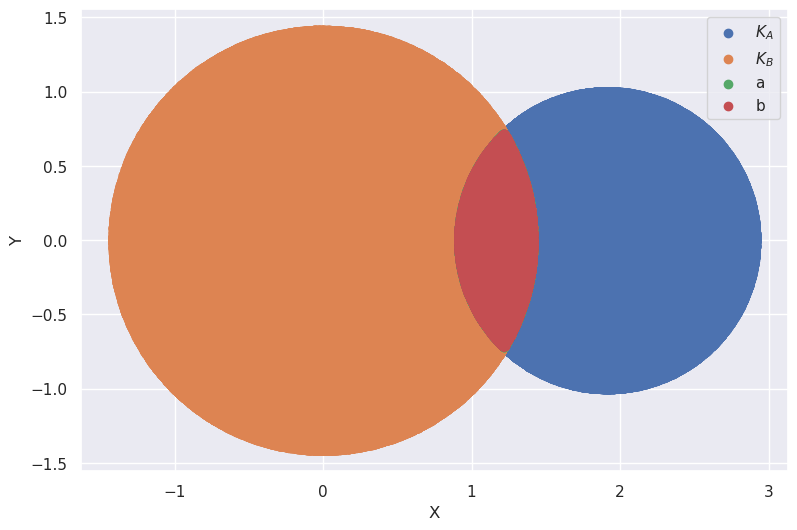

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(Xa, Ya, label = r"$K_{A}$")
plt.scatter(Xb, Yb, label = r"$K_{B}$")
plt.scatter(nx, ny, label = r"a")
plt.scatter(nx_2, ny_2, label = r"b")
plt.axis('scaled')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [30]:
mu1Tab = np.array(mu1Tab)
mu2Tab = np.array(mu2Tab)

mu1Tab_2 = np.array(mu1Tab_2)
mu2Tab_2 = np.array(mu2Tab_2)

check = np.array(check)

sigma2 = (mu2Tab-mu1Tab*mu1Tab)    
sigma2 = sigma2/check

sigma2_2 = (mu2Tab_2-mu1Tab_2*mu1Tab_2)    
sigma2_2 = sigma2_2/check

sigma = np.sqrt(sigma2)
sigma_2 = np.sqrt(sigma2_2)

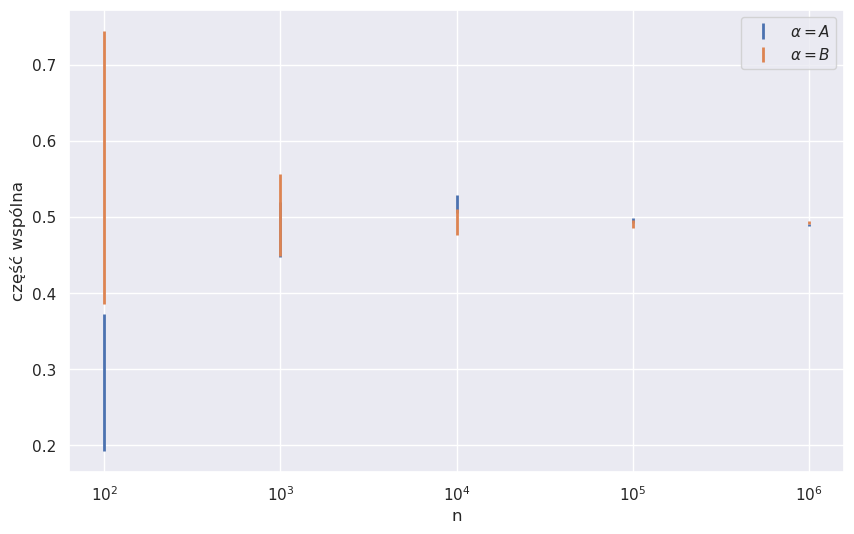

In [31]:
plt.figure(figsize=(10, 6))

plt.errorbar(check, mu1Tab, yerr=sigma, label = r"$\alpha = A$", linestyle = 'None',elinewidth = 2)
plt.errorbar(check, mu1Tab_2, yerr=sigma_2, label = r"$\alpha = B$", linestyle = 'None',elinewidth = 2)
plt.xscale('log') 
plt.legend()
plt.xlabel('n')
plt.ylabel('część wspólna')
plt.show()

In [11]:
RA = 1
RB = np.sqrt(2)*RA
xa =  RB + 0.5*RA
xb = 0.0

Xa = RA*np.array(Xbis_A) + xa
Ya = RA*np.array(Ybis_A)
Xb = RB*np.array(Xbis_B)
Yb = RB*np.array(Ybis_B)

check = [100, 1000, 10000 ,100000, 1000000]

thetaSum = 0.0
RA2 = np.power(RA,2)
RB2 = np.power(RB,2)
nx = []
ny = []
mu1Tab = []
mu2Tab = []

In [12]:
for i in range(1,N+1):
    xi = Xa[i-1]
    yi = Ya[i-1]
    t = np.power(xi,2) + np.power(yi,2)
    if t <= RB2:
        thetaSum+=1
        nx.append(xi)
        ny.append(yi)
    if i in check:
        mu1 = np.pi*thetaSum*RA2/i
        mu2 = np.pi*RA2*mu1
        mu1Tab.append(mu1)
        mu2Tab.append(mu2)
        print(i)

thetaSum_2 = 0.0
nx_2 = []
ny_2 = []
mu1Tab_2 = []
mu2Tab_2 = []

for i in range(1,N+1):
    xii = Xb[i-1] 
    yii = Yb[i-1]
    t = np.power(xii-xa,2) + np.power(yii,2)
    if t <= RA2:
        thetaSum_2+=1
        nx_2.append(xii)
        ny_2.append(yii)
    if i in check:
        mu11 = np.pi*thetaSum_2*RB2/i
        mu22 = np.pi*RB2*mu11
        mu1Tab_2.append(mu11)
        mu2Tab_2.append(mu22)

100
1000
10000
100000
1000000


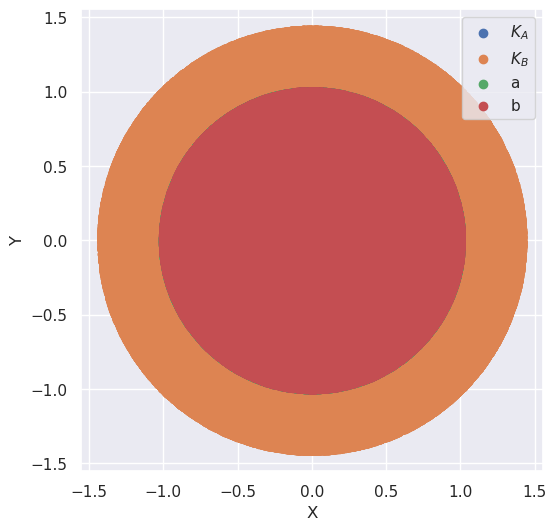

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(Xa, Ya, label = r"$K_{A}$")
plt.scatter(Xb, Yb, label = r"$K_{B}$")
plt.scatter(nx, ny, label = r"a")
plt.scatter(nx_2, ny_2, label = r"b")
plt.axis('scaled')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [17]:
mu1Tab = np.array(mu1Tab)
mu2Tab = np.array(mu2Tab)

mu1Tab_2 = np.array(mu1Tab_2)
mu2Tab_2 = np.array(mu2Tab_2)

check = np.array(check)

sigma2 = (mu2Tab-mu1Tab*mu1Tab)    
sigma2 = sigma2/check

sigma2_2 = (mu2Tab_2-mu1Tab_2*mu1Tab_2)    
sigma2_2 = sigma2_2/check

sigma = np.sqrt(sigma2)
sigma_2 = np.sqrt(sigma2_2)

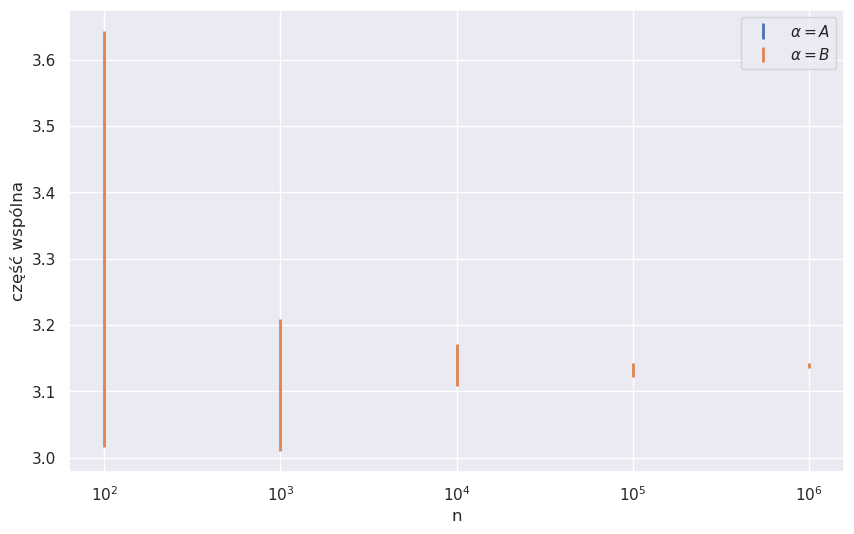

In [20]:
plt.figure(figsize=(10, 6))

plt.errorbar(check, mu1Tab, yerr=sigma, label = r"$\alpha = A$", linestyle = 'None',elinewidth = 2)
plt.errorbar(check, mu1Tab_2, yerr=sigma_2, label = r"$\alpha = B$", linestyle = 'None',elinewidth = 2)
plt.xscale('log') 
plt.legend()
plt.xlabel('n')
plt.ylabel('część wspólna')
plt.show()